In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

This project follows the analysis from

https://nicholastsmith.wordpress.com/2016/04/19/stock-market-prediction-using-multi-layer-perceptrons-with-tensorflow/

In [3]:
df = pd.read_csv('BA_all.csv', parse_dates=['Date'])

In [4]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15680 entries, 0 to 15679
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       15680 non-null  datetime64[ns]
 1   Open       15680 non-null  float64       
 2   High       15680 non-null  float64       
 3   Low        15680 non-null  float64       
 4   Close      15680 non-null  float64       
 5   Adj Close  15680 non-null  float64       
 6   Volume     15680 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 857.6 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-02,0.837449,0.837449,0.823045,0.823045,0.190931,352350
1,1962-01-03,0.835391,0.851852,0.835391,0.839506,0.194750,710775
2,1962-01-04,0.839506,0.853909,0.831276,0.831276,0.192840,911250
3,1962-01-05,0.831276,0.835391,0.792181,0.814815,0.189022,880875
4,1962-01-08,0.814815,0.829218,0.804527,0.816872,0.189499,473850
...,...,...,...,...,...,...,...
15675,2024-04-11,174.470001,174.699997,171.380005,173.360001,173.360001,7625100
15676,2024-04-12,172.199997,173.240005,169.369995,169.550003,169.550003,7548900
15677,2024-04-15,170.740005,171.179993,167.529999,167.820007,167.820007,6490700
15678,2024-04-16,168.139999,170.639999,167.750000,170.550003,170.550003,7976300


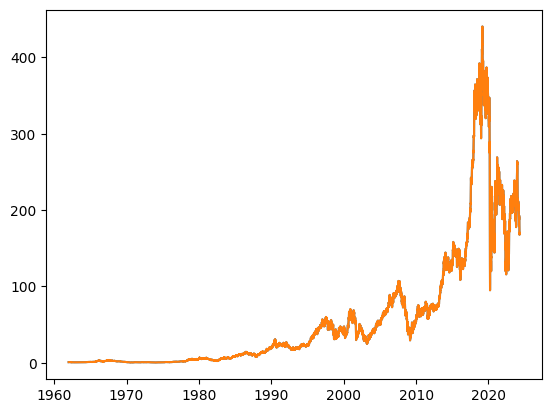

In [5]:
plt.plot(df['Date'], df['Close'])
plt.plot('Date', 'Close', data = df)

<Axes: ylabel='Frequency'>

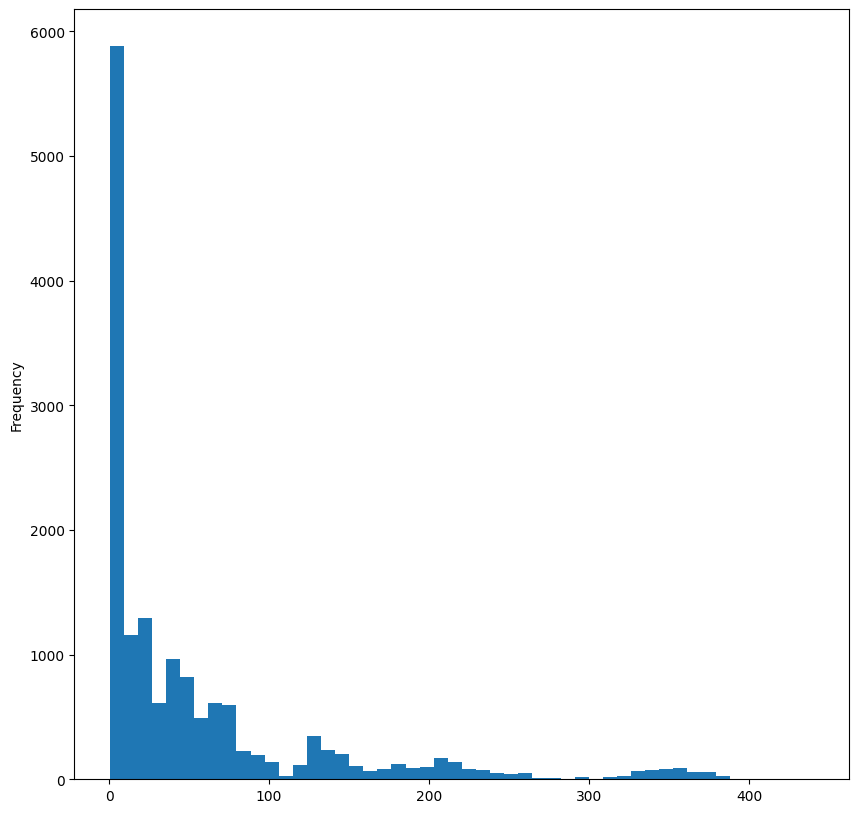

In [6]:
df.Close.plot(kind = 'hist', bins = 50, figsize = (10,10))

In [18]:
def return_moving(d0:float, d1:float) : 
    #return 'meaningful price change'
    w = (d1 - d0)/d0
    if w < -0.005 : 
        return -1
    elif w > 0.005 : 
        return 1 
    else :
        return 0

In [20]:
#전략 1

money = 0
for i in range(1, len(df) - 1) :
    k = return_moving(df['Close'][i-1], df['Close'][i])
    if k == 1 :
        money += (df['Open'][i+1] - df['Close'][i+1])
    elif k == -1 :
        money += (df['Close'][i+1] - df['Open'][i+1])
    else : 
        pass
print(money)

-16.734982000000443


In [21]:
#전략 2

money = 0
for i in range(1, len(df) - 1) :
    k = return_moving(df['Close'][i-1], df['Close'][i])
    if k == 1 :
        money += (df['Open'][i+1] - df['Close'][i+1])
    else : 
        pass
print(money)

51.933443999999554


In [22]:
def return_moving2(d0:float, d1:float) : 
    #return 'meaningful price change'
    w = (d1 - d0)/d0
    if w < -0.003 : 
        return -1
    elif w > 0.003 : 
        return 1 
    else :
        return 0

In [23]:
#전략 3

money = 0
for i in range(1, len(df) - 1) :
    k = return_moving2(df['Close'][i-1], df['Close'][i])
    if k == 1 :
        money += (df['Open'][i+1] - df['Close'][i+1])
    else : 
        pass
print(money)

46.22404999999975


93.90517599999981


   ---------------------------------------- 0.0/12.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.2 MB 1.3 MB/s eta 0:00:10
   - -------------------------------------- 0.5/12.2 MB 7.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.2 MB 8.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.5/12.2 MB 9.5 MB/s eta 0:00:02
   ------ --------------------------------- 2.0/12.2 MB 9.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.4/12.2 MB 9.4 MB/s eta 0:00:02
   --------- ------------------------------ 2.9/12.2 MB 9.7 MB/s eta 0:00:01
   ----------- ---------------------------- 3.4/12.2 MB 9.9 MB/s eta 0:00:01
   ------------ --------------------------- 3.9/12.2 MB 9.9 MB/s eta 0:00:01
   -------------- ------------------------- 4.4/12.2 MB 10.0 MB/s eta 0:00:01
   -------------- ------------------------- 4.5/12.2 MB 9.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.6/12.2 MB 8.5 MB/s eta 0:00:01
   --

     ---------------------------------------- 0.0/315.3 kB ? eta -:--:--
     -------------------------------------  307.2/315.3 kB 9.6 MB/s eta 0:00:01
     -------------------------------------- 315.3/315.3 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---- ----------------------------------- 0.3/3.0 MB 6.1 MB/s eta 0:00:01
     ------- -------------------------------- 0.6/3.0 MB 5.9 MB/s eta 0:00:01
     ----------- ---------------------------- 0.8/3.0 MB 5.8 MB/s eta 0:00:01
     --------------- -----

In [9]:
edv = yf.Ticker('EDV')

In [11]:
edv.info

{'longBusinessSummary': "The advisor employs an indexing investment approach designed to track the performance of the Bloomberg U.S. Treasury STRIPS 20-30 Year Equal Par Bond Index. This index includes zero-coupon U.S. Treasury securities (Treasury STRIPS), which are backed by the full faith and credit of the U.S. government, with maturities ranging from 20 to 30 years. The fund invests by sampling the index. At least 80% of it's assets will be invested in U.S. Treasury securities held in the index.",
 'maxAge': 86400,
 'priceHint': 2,
 'previousClose': 70.05,
 'open': 70.05,
 'dayLow': 69.53,
 'dayHigh': 70.04,
 'regularMarketPreviousClose': 70.05,
 'regularMarketOpen': 70.05,
 'regularMarketDayLow': 69.53,
 'regularMarketDayHigh': 70.04,
 'volume': 138980,
 'regularMarketVolume': 138980,
 'averageVolume': 484108,
 'averageVolume10days': 515890,
 'averageDailyVolume10Day': 515890,
 'bid': 69.57,
 'ask': 69.63,
 'bidSize': 1400,
 'askSize': 1800,
 'yield': 0.0378,
 'totalAssets': 41327